<a href="https://colab.research.google.com/github/bassala/google_colab/blob/main/classification_image_settellite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installation de kaggle
!pip install -q kaggle

In [1]:
# création de dossier kaggle
!mkdir -p ~/.kaggle/

In [2]:
# copier le fichier kaggle.json dans le dossier kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/

In [3]:
#donner les droits a kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets list

In [4]:
! kaggle datasets download -d mahmoudreda55/satellite-image-classification

Dataset URL: https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification
License(s): copyright-authors
 41% 9.00M/21.8M [00:00<00:00, 30.8MB/s]
100% 21.8M/21.8M [00:00<00:00, 63.5MB/s]


In [5]:
! unzip /content/satellite-image-classification.zip -d classification_datasets

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: classification_datasets/data/cloudy/train_23566.jpg  
  inflating: classification_datasets/data/cloudy/train_23598.jpg  
  inflating: classification_datasets/data/cloudy/train_23608.jpg  
  inflating: classification_datasets/data/cloudy/train_23634.jpg  
  inflating: classification_datasets/data/cloudy/train_23636.jpg  
  inflating: classification_datasets/data/cloudy/train_23646.jpg  
  inflating: classification_datasets/data/cloudy/train_2366.jpg  
  inflating: classification_datasets/data/cloudy/train_23664.jpg  
  inflating: classification_datasets/data/cloudy/train_23706.jpg  
  inflating: classification_datasets/data/cloudy/train_2380.jpg  
  inflating: classification_datasets/data/cloudy/train_23805.jpg  
  inflating: classification_datasets/data/cloudy/train_23806.jpg  
  inflating: classification_datasets/data/cloudy/train_23826.jpg  
  inflating: classification_datasets/data/cloudy/trai

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [9]:
#Setting Constraints
path = "/content/classification_datasets/data"
batch_size = 32
height = 72
width = 128

In [10]:
#Loading the dataset and splitting into training and validation sets
train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

val = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


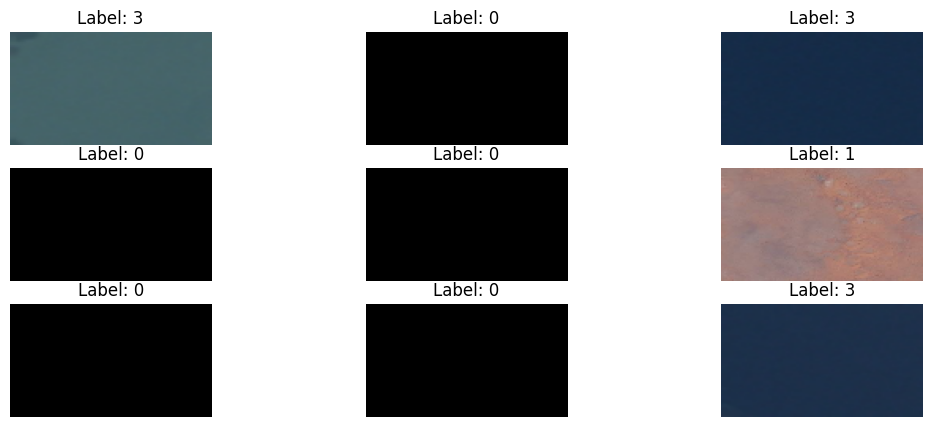

In [11]:
# Print the first images with their labels
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

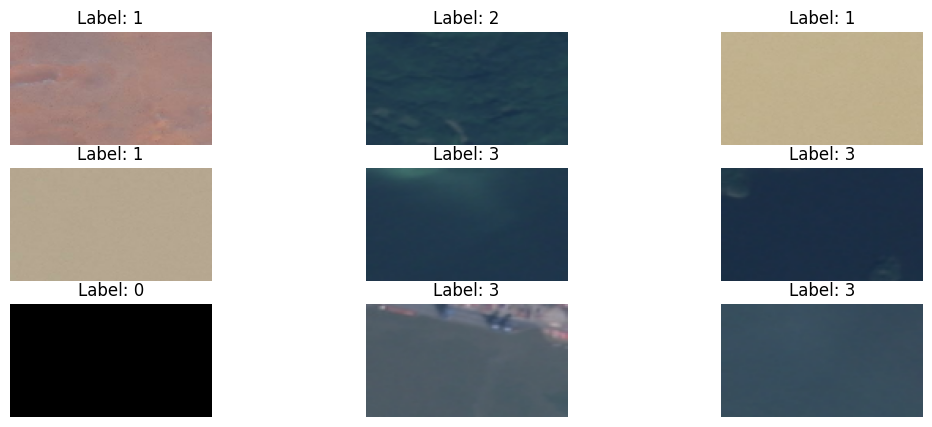

In [12]:
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [13]:
amount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {amount} different Classes")

There are 4 different Classes


In [14]:
classes = {
    0: "cloudy",
    1: "desert",
    2: "water",
    3: "green_area"
}

In [15]:
# CNN model architecture
model = Sequential([
    layers.Input(shape=(height, width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(amount)
])

# The first layer has 16 filters, kernel size equal to 3
# The max pooling layer allows to reduce the spatial dimensions
# The 2D feature flattened to 1D vector allows to prepare for the fully connected layer
# The fully connected layer has 128 neurons
# The output layer has 4 neurons (because there are 4 different classes)

In [16]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epochs = 20
history = model.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 56s 381ms/step - accuracy: 0.7486 - loss: 0.5515 - val_accuracy: 0.8925 - val_loss: 0.2148
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 365ms/step - accuracy: 0.9152 - loss: 0.1869 - val_accuracy: 0.8979 - val_loss: 0.2280
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 368ms/step - accuracy: 0.9140 - loss: 0.1879 - val_accuracy: 0.9414 - val_loss: 0.1618
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 369ms/step - accuracy: 0.9248 - loss: 0.1589 - val_accuracy: 0.9245 - val_loss: 0.1742
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 78s 339ms/step - accuracy: 0.9313 - loss: 0.1583 - val_accuracy: 0.9014 - val_loss: 0.1978
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 85s 358ms/step - accuracy: 0.9281 - loss: 0.1509 - val_accuracy: 0.9369 - val_loss: 0.1408
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 81s 353ms/step - accuracy: 0.9439 - loss: 0.1380 - val_accuracy: 0.9432 - val_loss: 0.1539
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 84s 363ms/step - accuracy: 0.9509 - loss: 0

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 72, 128, 3)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 72, 128, 16)         │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 18, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,611,630 (13.78 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,407,754 (9.18 MB)

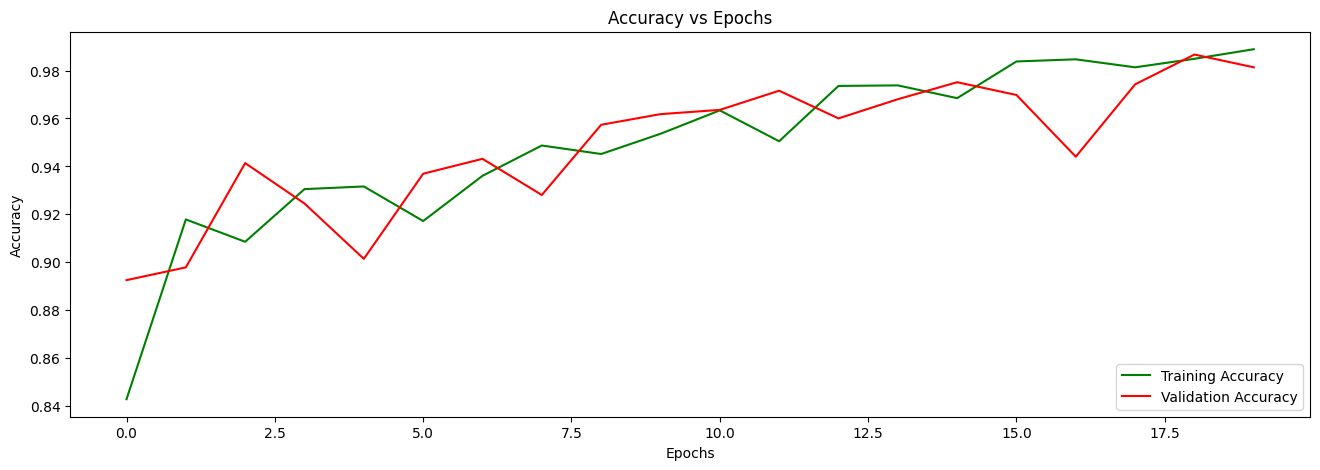

In [19]:
# accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

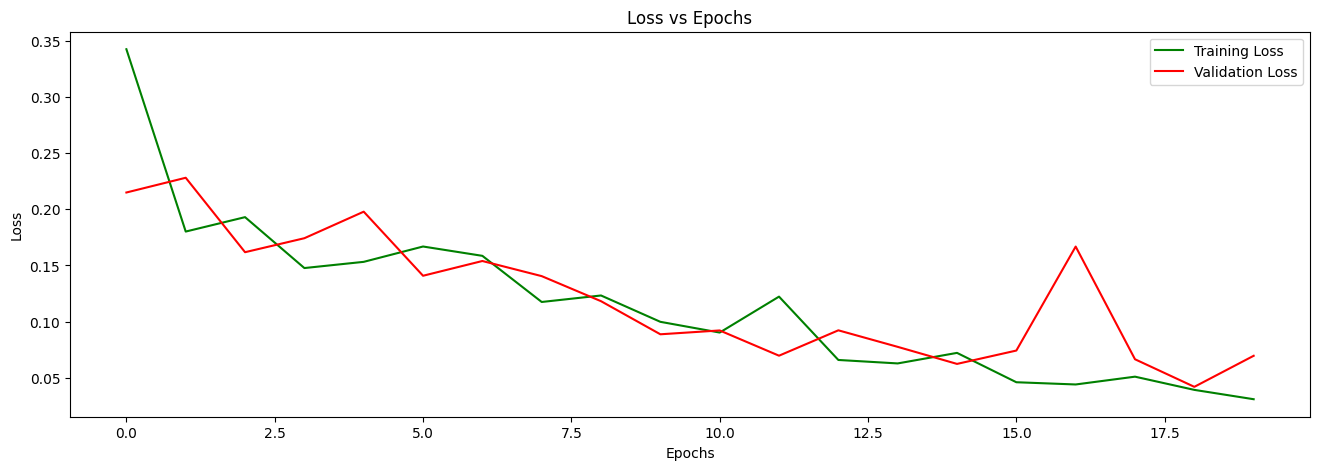

In [20]:
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


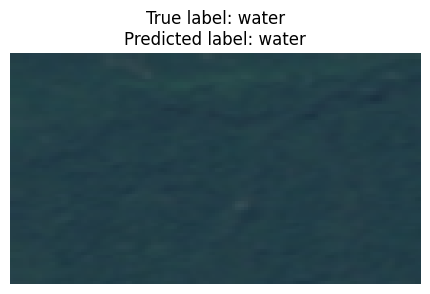

In [21]:
# Predicting one image from the validation dataset
plt.figure(figsize=(6, 3))
for images, labels in val.take(1):
    sample_image = images[1]
    true_label = labels[1]

    sample_image = tf.expand_dims(sample_image, axis=0)

    predictions = model.predict(sample_image)

    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class = classes[predicted_class_index]

    plt.imshow(sample_image[0].numpy().astype("uint8"))
    plt.title(f"True label: {classes[true_label.numpy()]}\nPredicted label: {predicted_class}")
    plt.axis('off')

plt.show()